In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Importing data (just original for now)

In [2]:
features_num = [
    'Total_flux', 'Peak_flux', 
       'NUV_flux_corr', 'u_flux_corr', 'Bw_flux_corr', 'R_flux_corr',
       'I_flux_corr', 'z_flux_corr', 'y_flux_corr',
       'J_flux_corr', 'H_flux_corr', 'K_flux_corr', 'Ks_flux_corr',
       'ch1_flux_corr', 'ch2_flux_corr', 'ch3_flux_corr', 'ch4_flux_corr',
       'F_MIPS_24', 'F_PACS_100', 'F_PACS_160', 'F_SPIRE_250', 'F_SPIRE_350',
       'F_SPIRE_500', 'Z_BEST',
       'g_flux_corr', 'nb921_hsc_flux_corr'
    ]
y_column = "Classification"

classes = ['jet-mode radio AGN/low-excitation radio galaxy', 'quasar-like radio AGN / high-excitation radio galaxy', 
           'radio-quiet AGN', 'star-forming galaxy']

In [3]:
data = pd.read_csv("../../Data/Fangyou_data/Cleaned/combined_using_similar_columns.csv")
data['Source'] = 'Original'

In [4]:
X = data[features_num]
y = data[[y_column, 'Source', 'Xray', 'Opt_spec', 'IRAGN', 'Donley']]

In [5]:
X.isna().sum(axis=0)

Total_flux                 0
Peak_flux                  0
NUV_flux_corr          19450
u_flux_corr             7724
Bw_flux_corr           60465
R_flux_corr             2103
I_flux_corr             4479
z_flux_corr             3008
y_flux_corr            32610
J_flux_corr            10216
H_flux_corr            60312
K_flux_corr            14495
Ks_flux_corr           60365
ch1_flux_corr            675
ch2_flux_corr             36
ch3_flux_corr           1755
ch4_flux_corr           1359
F_MIPS_24               3756
F_PACS_100               896
F_PACS_160               896
F_SPIRE_250             3971
F_SPIRE_350             3971
F_SPIRE_500             3971
Z_BEST                     0
g_flux_corr            20263
nb921_hsc_flux_corr    49514
dtype: int64

In [6]:
len(X)

77609

# Dropping columns with little data (optional)

In [7]:
X = X.drop(columns=['NUV_flux_corr', 'Bw_flux_corr', 'y_flux_corr', 'H_flux_corr', 'Ks_flux_corr', 'K_flux_corr',
                   'g_flux_corr', 'nb921_hsc_flux_corr'])

## Filter by thin redshift slice (optional)

<AxesSubplot:>

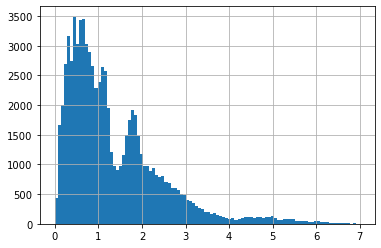

In [8]:
X.Z_BEST.hist(bins=100)

In [107]:
delta_z = 0.2

for z in np.arange(0.1,4,0.1):
    z = round(z,1)
    print(z, sum((X.Z_BEST >z) & (X.Z_BEST <(z+delta_z))))

0.1 6355
0.2 8161
0.3 9282
0.4 9171
0.5 9408
0.6 9189
0.7 8248
0.8 7345
0.9 6962
1.0 7215
1.1 5973
1.2 3803
1.3 2753
1.4 2871
1.5 3752
1.6 4819
1.7 5255
1.8 4576
1.9 3384
2.0 2773
2.1 2665
2.2 2524
2.3 2339
2.4 2164
2.5 1949
2.6 1795
2.7 1652
2.8 1461
2.9 1252
3.0 1106
3.1 941
3.2 788
3.3 674
3.4 580
3.5 532
3.6 473
3.7 384
3.8 320
3.9 263


In [108]:
z = 0.5
delta_z = 0.2

redshift_filt = (X.Z_BEST >z) & (X.Z_BEST <(z+delta_z))
X_sliced = X[redshift_filt]

In [109]:
len(X_sliced)

9408

# Dropping redshift column (optional)

In [110]:
X_sliced = X_sliced.drop(columns='Z_BEST')

## Filling nan's

In [111]:
# fill nans with 0s
#X_filled = X.fillna(0)

# FIlling with mean, filling with 0s caused a weird split into 2 groups
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#X_filled = imp_mean.fit_transform(X)

imp = IterativeImputer(max_iter=100, min_value=0)
X_filled = imp.fit_transform(X_sliced)

## Scaling (necessary for proper usage of T-sne)

In [112]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

scaler = StandardScaler()
X_final = scaler.fit_transform(X_filled)

## Running t-sne

In [113]:
# 30 with z=0.2-0.7 is nice, also with droppig columns
tsne = TSNE(perplexity=50, 
            init='random', 
            n_iter=10**5, 
            verbose=5, 
            n_jobs=8, 
            n_iter_without_progress=200,
            min_grad_norm=1e-4,
            learning_rate='auto',
            #random_state=42
           )

In [114]:
X_transformed = tsne.fit_transform(X_final)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 9408 samples in 0.000s...
[t-SNE] Computed neighbors for 9408 samples in 1.133s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9408
[t-SNE] Computed conditional probabilities for sample 2000 / 9408
[t-SNE] Computed conditional probabilities for sample 3000 / 9408
[t-SNE] Computed conditional probabilities for sample 4000 / 9408
[t-SNE] Computed conditional probabilities for sample 5000 / 9408
[t-SNE] Computed conditional probabilities for sample 6000 / 9408
[t-SNE] Computed conditional probabilities for sample 7000 / 9408
[t-SNE] Computed conditional probabilities for sample 8000 / 9408
[t-SNE] Computed conditional probabilities for sample 9000 / 9408
[t-SNE] Computed conditional probabilities for sample 9408 / 9408
[t-SNE] Mean sigma: 0.359981
[t-SNE] Computed conditional probabilities in 0.579s
[t-SNE] Iteration 50: error = 90.0834198, gradient norm = 0.0004141 (50 iterations in 4.663s)
[t-SNE] Iteration 100:

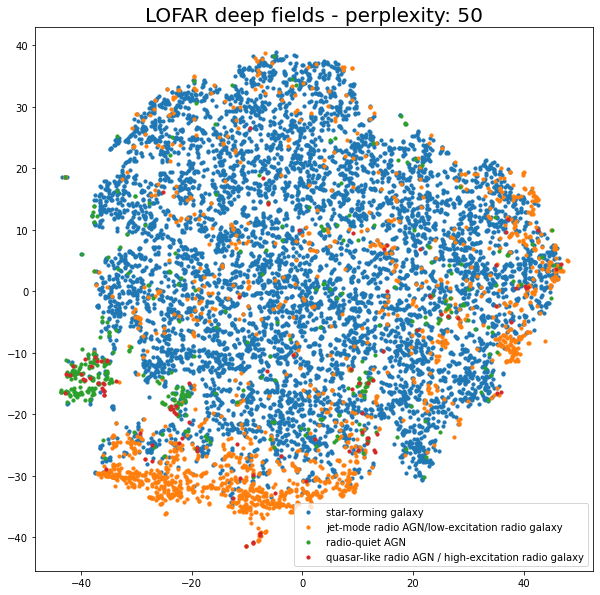

In [115]:
plt.figure(figsize=(10,10))
classes = ['star-forming galaxy',
           'jet-mode radio AGN/low-excitation radio galaxy',
           'radio-quiet AGN',
           'quasar-like radio AGN / high-excitation radio galaxy',
       ]
for i in classes:
    #filt = y.loc[sample.index]['Classification']==i
    filt = y['Classification'][redshift_filt]==i
    plt.scatter(X_transformed[:,0][filt], X_transformed[:,1][filt], s=10,label=i)
plt.legend()
plt.title('LOFAR deep fields - perplexity: 50', fontsize=20)
plt.savefig('Original_t-sne.pdf', bbox_inches='tight')
plt.show()

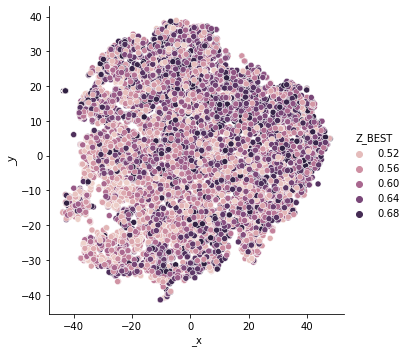

In [116]:
import seaborn as sns
sns.relplot(x=X_transformed[:,0], y=X_transformed[:,1], hue=X['Z_BEST'][redshift_filt])

array([ 0.21307592,  1.11987916,  0.62751334, ..., -0.75040253,
       -1.58029044,  0.90911825])

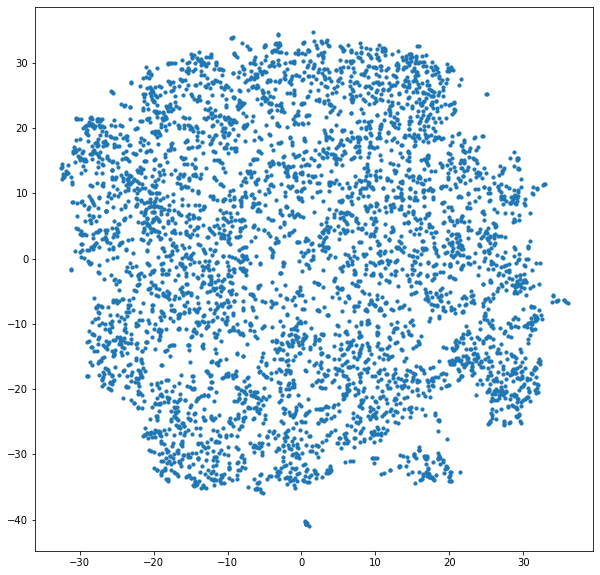

In [68]:
plt.figure(figsize=(10,10))
plt.scatter(X_transformed[:,0], X_transformed[:,1], s=10)

In [119]:
tempdata = np.hstack((X_filled, X_transformed, y['Classification'][redshift_filt].to_numpy()[:, np.newaxis]))
columns = list(X.drop(columns='Z_BEST').columns)
columns.extend(['x', 'y', 'class'])

temp = pd.DataFrame(data=tempdata, columns=columns)
temp.to_csv('temp.csv', index=False)

In [118]:
X_filled

array([[2.88028949e+02, 3.05324605e+02, 2.37747270e+00, ...,
        1.28721214e+04, 5.90323129e+03, 3.44151616e+03],
       [3.72131066e+02, 2.86273462e+02, 7.94661230e+00, ...,
        1.37497459e+04, 7.15699458e+03, 4.28226016e+03],
       [3.16891471e+02, 2.74502580e+02, 2.91750544e-01, ...,
        2.20041777e+04, 1.60779004e+04, 7.70144531e+03],
       ...,
       [3.56026664e+02, 2.78747086e+02, 2.98916650e+00, ...,
        2.40503828e+04, 1.87952188e+04, 5.54040625e+03],
       [6.88602761e+02, 3.84691808e+02, 2.26984644e+00, ...,
        1.75818809e+04, 7.38672168e+03, 2.48131299e+03],
       [5.63886534e+02, 4.19061185e+02, 2.89880663e-01, ...,
        8.29133438e+03, 5.10032003e+03, 4.01477492e+03]])

## In a loop

In [28]:
for i in range(5,105,5):
    tsne = TSNE(perplexity=i, 
            init='random', 
            n_iter=10**4, 
            verbose=0, 
            n_jobs=8, 
            n_iter_without_progress=200,
            min_grad_norm=1e-4,
            learning_rate='auto'
           )
    
    X_transformed = tsne.fit_transform(X_final)
    
    print(i, tsne.kl_divergence_)
    

5 2.0911917686462402
10 2.2637412548065186
15 2.311823606491089
20 2.2601137161254883
25 2.250216245651245
30 2.208772897720337
35 2.2007291316986084
40 2.165316581726074
45 2.125393867492676
50 2.0977706909179688
55 2.063681125640869
60 2.058094024658203
65 2.0283162593841553
70 1.9994499683380127
75 1.9747750759124756
80 1.9500467777252197
85 1.926880121231079
90 1.9049180746078491
95 1.882767677307129
100 1.8628538846969604


In [29]:
for i in range(100,205,5):
    tsne = TSNE(perplexity=i, 
            init='random', 
            n_iter=10**4, 
            verbose=0, 
            n_jobs=8, 
            n_iter_without_progress=200,
            min_grad_norm=1e-4,
            learning_rate='auto'
           )
    
    X_transformed = tsne.fit_transform(X_final)
    
    print(i, tsne.kl_divergence_)
    

100 1.8639118671417236
105 1.8440067768096924
110 1.8474278450012207
115 1.8233089447021484
120 1.8063360452651978
125 1.7871242761611938
130 1.7898207902908325
135 1.7511597871780396
140 1.73198401927948
145 1.714510440826416
150 1.7221907377243042
155 1.6883583068847656
160 1.6749727725982666
165 1.666008472442627
170 1.6673065423965454
175 1.6275891065597534
180 1.6134800910949707
185 1.6176644563674927
190 1.5970147848129272
195 1.5857138633728027
200 1.56541907787323
